In [42]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from specim_test.specim.specfuncs import spec2d, spec1d
from astropy.io import fits as pf
from scipy import interpolate

In [2]:
file_loc = 'B0631_LRIS_spectra/*'

In [3]:
file_list = []
out_file = []
for i,p in enumerate(glob.glob(file_loc)):
    if 'cleaned' in p and 'B0631' in p:

        file_list.append(p)
        frame = p.split('_')[-3][:4]
        out_file.append('B0631_r'+ frame + '_spec1d.fits')

In [4]:
file_list

['B0631_LRIS_spectra/B0631_r0042_cleaned.fits',
 'B0631_LRIS_spectra/B0631_r0040_cleaned.fits',
 'B0631_LRIS_spectra/B0631_r0041_cleaned.fits']

### I have used this notebook to extract 1d spectra from each frame and coadd them. I have tried adding Gaussian or moffat profile for image but the extracted spectra for those profiles doesn't look good. So ultimately used onle one moffat profile to extract the deflector spectra. The following two profile trial is just for demonstration.


Loading file B0631_LRIS_spectra/B0631_r0041_cleaned.fits
-----------------------------------------------
Read in 2-dimensional spectrum from B0631_LRIS_spectra/B0631_r0041_cleaned.fits (HDU=1)
The input dataset was trimmed
 xrange: 25:136.  yrange: 0:4096
Final data dimensions (x y): 111 x 4096

Dispersion axis:              x
N_pixels along dispersion axis: 111

Found 1 NaNs in the two-dimensional spectrum

Old value of dispaxis: x

Dispersion axis:              y
N_pixels along dispersion axis: 4096


Dispersion : 0.800000
Found 110 NaNs in the two-dimensional spectrum

sky subtracted and cosmic ray rejected data has been resampled along with vardata in place of the coordinateds whcih rectify the tilted wave image


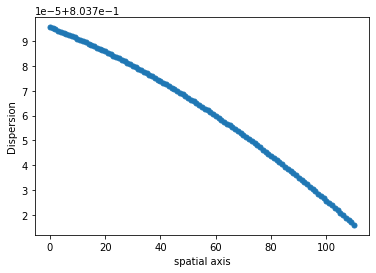

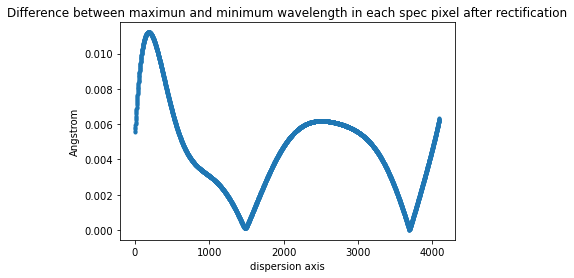

In [25]:
spec = spec2d.Spec2d(file_list[2], hext=1, varext=2, xtrim=[25, 135])
spec.set_dispaxis('y')
spec.do_waverect(doplot=True, resamp_ord=1)

Profile max value (before normalization) 48.362801


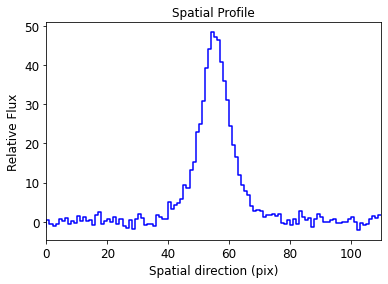


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 0
Number of Moffat profile : 1

Now enter constants of the background polynomial upto degree 0
c0 : -1

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 50, 56, 3, 4

amplitude=50.000000, x_0=56.000000, gamma=3.000000, alpha=4.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1]
Components: 
    [0]: <Polynomial1D(0, c0=0.09361174)>

    [1]: <Moffat1D(amplitude=47.88080251, x_0=55.84863026, gamma=8.47574607, alpha=2.1255826)>
Parameters:
            c0_0           amplitude_1    ...      gamma_1           alpha_1     
    ------------------- ----------------- ... ----------------- -----------------
    0.0

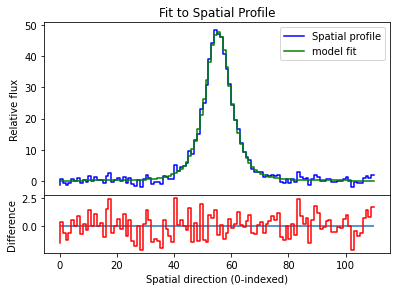

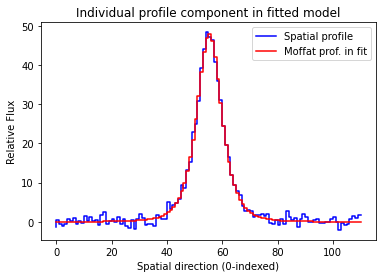


Do you want to start over ? : type yes/no
no


<CompoundModel(c0_0=0.09361174, amplitude_1=47.88080251, x_0_1=55.84863026, gamma_1=8.47574607, alpha_1=2.1255826)>

In [26]:
spec.spatial_profile(pixrange=[2100, 2400])
plt.show()
spec.initial_model()

Profile max value (before normalization) 52.924389


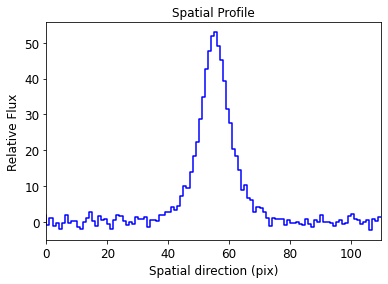


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 0
Number of Moffat profile : 2

Now enter constants of the background polynomial upto degree 0
c0 : -0.5

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 50, 56, 3, 4

amplitude=50.000000, x_0=56.000000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 2 : 10, 62, 2, 3

amplitude=10.000000, x_0=62.000000, gamma=2.000000, alpha=3.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Polynomial1D(0, c0=-0.05997231)>

    [1]: <Moffat1D(amplitude=52.15030807, x_0=55.66804272, gamma=8.07216386, alpha=2.05942554)>

    [2]: <Moffat1D(amplitude=2.21164804, x_0=63.3414804, 

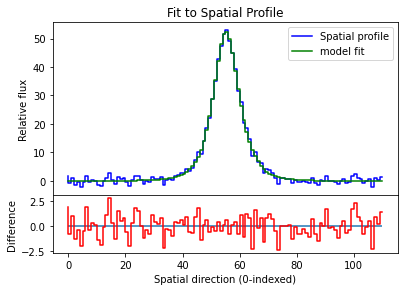

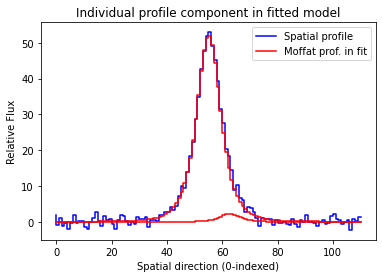


Do you want to start over ? : type yes/no
no


<CompoundModel(c0_0=-0.05997231, amplitude_1=52.15030807, x_0_1=55.66804272, gamma_1=8.07216386, alpha_1=2.05942554, amplitude_2=2.21164804, x_0_2=63.3414804, gamma_2=8.30037521, alpha_2=2.85493561)>

In [6]:
spec.spatial_profile(pixrange=[2100, 2400])
plt.show()
spec.initial_model()


Initial model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Polynomial1D(0, c0=-0.05997231)>

    [1]: <Moffat1D(amplitude=52.15030807, x_0=55.66804272, gamma=8.07216386, alpha=2.05942554)>

    [2]: <Moffat1D(amplitude=2.21164804, x_0=63.3414804, gamma=8.30037521, alpha=2.85493561)>
Parameters:
            c0_0            amplitude_1     ...     gamma_2           alpha_2     
    -------------------- ------------------ ... ---------------- -----------------
    -0.05997230611193501 52.150308066143154 ... 8.30037520799944 2.854935608334432

-------------------------------------------


Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Polynomial1D(0, c0=-0.07437131)>

    [1]: <Moffat1D(amplitude=51.20952603, x_0=55.59569644, gamma=7.93677229, alpha=2.02857501)>

    [2]: <Moffat1D(amplitude=3.1980298

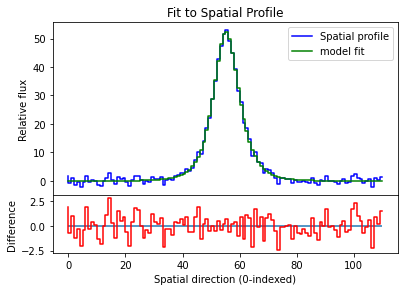

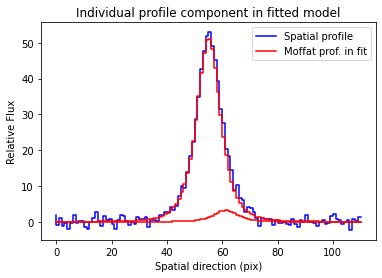

<CompoundModel(c0_0=-0.07437131, amplitude_1=51.20952603, x_0_1=55.59569644, gamma_1=7.93677229, alpha_1=2.02857501, amplitude_2=3.19802982, x_0_2=61.79569644, gamma_2=7.93677229, alpha_2=2.02857501)>

In [7]:
def tie_pos1_gauss(model):
    return model.mean_2 - 6.356     #28.43

def tie_pos2_gauss(model):
     return model.mean_2 + 6.677        # 32.289

def tie_pos1_moffat(model):
     return model.x_0_1 + 6.2
            
def tie_pos2_moffat(model):
    return model.x_0_1 + 6.2

def tie_gamma_moffat(model):
    return model.gamma_1

def tie_alpha_moffat(model):
    return model.alpha_1 

# for two Gaussian and one Moffat  
#spec.mod0[1].mean.tied = tie_pos1_moffat 
#spec.mod0[3].x_0.tied = tie_pos1_moffat 
spec.mod0[2].x_0.tied = tie_pos1_moffat

spec.mod0[2].gamma.tied = tie_gamma_moffat
spec.mod0[2].alpha.tied = tie_alpha_moffat
#spec.mod0[3].gamma.tied = tie_gamma_moffat
#spec.mod0[3].alpha.tied = tie_alpha_moffat

#mod1[4].stddev = 3.0
#mod1[4].stddev.fixed = True

# for two Gaussian profile
#mod[1].mean.tied = tie_pos1_gauss 
#mod[3].mean.tied = tie_pos2_gauss 
#mod1[4].mean.tied = tie_pos4_gauss 
#mod1[4].mean.tied = tie_pos4_gauss
spec.refined_model(spec.mod0)


Running fit_trace
---------------------------------------------------------
Fitting to the trace at 204 segments
  of the 2D spectrum with stepsize=20 pix ...
    Done
Fitting polynomial of degree 2 to parameter: c0_0
Fitting polynomial of degree 2 to parameter: x_0_1
Fitting polynomial of degree 2 to parameter: gamma_1
Fitting polynomial of degree 2 to parameter: alpha_1


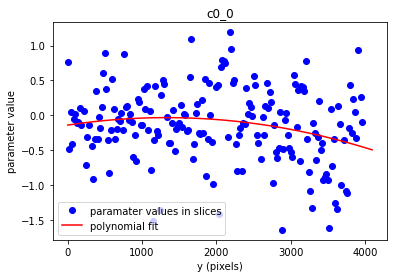

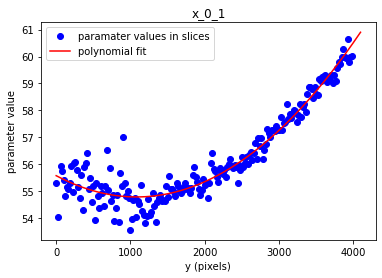

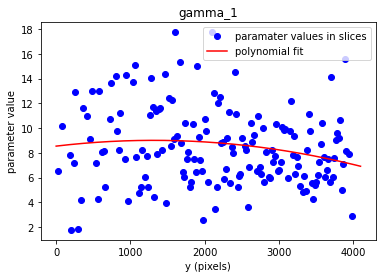

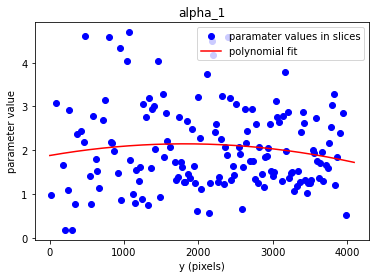

In [27]:
spec.find_and_trace(spec.mod0, stepsize=20, fitorder={'x_0_1':2, 'mean_1':2, 'gamma_2':2, 'alpha_2':2},
                    fitrange=[0, 4000], polyorder=2)

Fitting to 1 components, plus a background
Extracting the spectrum.  Please be patient
 Extraction range (pixels): 0 - 4100
Fitting to the trace at 4096 segments
  of the 2D spectrum with stepsize=1 pix ...
 Spectrum Start:  5648.21
 Spectrum End:     8924.21
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80


Plotting the spectrum


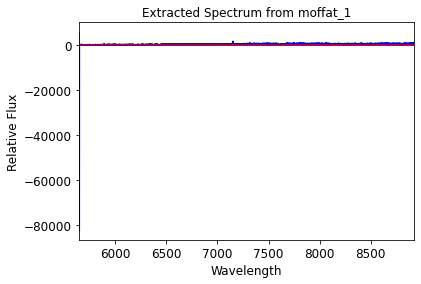

In [28]:
spec.extract(method='modelfit', extrange=[0, 4100])

Fitting to 2 components, plus a background
Extracting the spectrum.  Please be patient
 Extraction range (pixels): 0 - 4100
Fitting to the trace at 4096 segments
  of the 2D spectrum with stepsize=1 pix ...
 Spectrum Start:  5649.56
 Spectrum End:     8925.56
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80

 Spectrum Start:  5649.56
 Spectrum End:     8925.56
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80


Plotting the spectrum


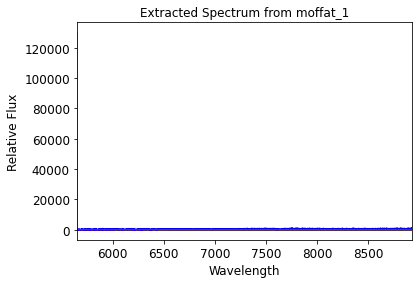

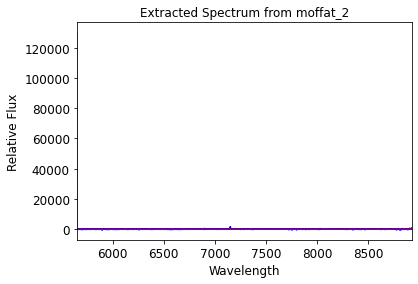

In [9]:
spec.extract(method='modelfit', extrange=[0, 4100])

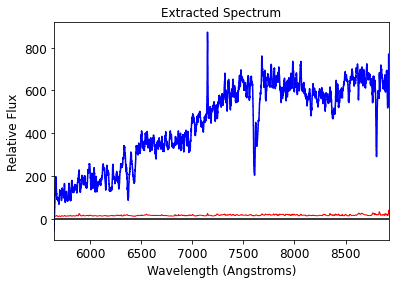

In [29]:
spec.spectra[0][1].smooth(11)

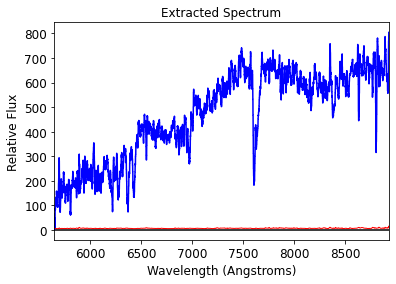

In [10]:
spec.spectra[0][1].smooth(11)
#spec.spectra[1][1].mark_lines('strongem', z=1.55, usesmooth=True)

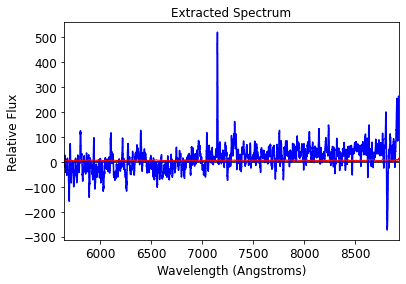

In [13]:
spec.spectra[1][1].smooth(11)

### response correct the 1d spectrum before saving. Resample the response curve in the wavelength array of the extracted spectrum.

In [30]:
resp_sp = spec1d.Spec1d('../other_spectra/response_curve_from_feige110_r11202020.txt')


Reading spectrum from ../other_spectra/response_curve_from_feige110_r11202020.txt
Expected file format: text
 Spectrum Start:  5645.15
 Spectrum End:     8920.92
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80



In [31]:
resp_sp.resample(owave=spec.spectra[0][1]['wav'])

resample: replacing input spectrum with resampled version
resample: for now not resampling the variance


In [32]:
spec.spectra[0][1].resp_corr(resp_sp.rsflux*10**-2, action='divide')

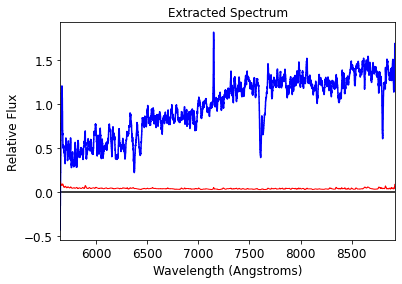

In [33]:
spec.spectra[0][1].smooth(11)

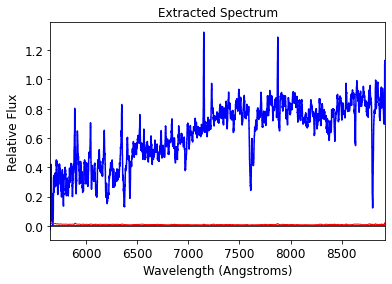

In [17]:
spec.spectra[0][1].smooth(11)
#spec.spectra[1][1].mark_lines('abs', z=0.62, usesmooth=True)

In [34]:
spec.spectra[0][1].save('B0631_LRIS_spectra/spec1d_B0631_lris_frame41_deflector_Jan2022.fits', outformat='fits')

Saved spectrum to file B0631_LRIS_spectra/spec1d_B0631_lris_frame41_deflector_Jan2022.fits in format fits


### coadding the 1d spectra extracted from three frames.

In [51]:
spec1 = spec1d.Spec1d('B0631_LRIS_spectra/spec1d_B0631_lris_frame42_deflector_Jan2022.fits', informat='fits')
spec2 = spec1d.Spec1d('B0631_LRIS_spectra/spec1d_B0631_lris_frame41_deflector_Jan2022.fits', informat='fits')
spec3 = spec1d.Spec1d('B0631_LRIS_spectra/spec1d_B0631_lris_frame40_deflector_Jan2022.fits', informat='fits')


Reading spectrum from B0631_LRIS_spectra/spec1d_B0631_lris_frame42_deflector_Jan2022.fits
Expected file format: fits
 Spectrum Start:  5649.56
 Spectrum End:     8925.56
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80


Reading spectrum from B0631_LRIS_spectra/spec1d_B0631_lris_frame41_deflector_Jan2022.fits
Expected file format: fits
 Spectrum Start:  5648.21
 Spectrum End:     8924.21
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80


Reading spectrum from B0631_LRIS_spectra/spec1d_B0631_lris_frame40_deflector_Jan2022.fits
Expected file format: fits
 Spectrum Start:  5647.76
 Spectrum End:     8923.77
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80



In [52]:
spec2.resample(owave=spec1['wav'])

resample: replacing input spectrum with resampled version
resample: for now not resampling the variance


In [53]:
spec3.resample(owave=spec1['wav'])

resample: replacing input spectrum with resampled version
resample: for now not resampling the variance


In [54]:
varmod2 = interpolate.splrep(spec2['wav'], np.sqrt(spec2['var']))
varout2 = interpolate.splev(spec1['wav'], varmod2)**2

varmod3 = interpolate.splrep(spec3['wav'], np.sqrt(spec3['var']))
varout3 = interpolate.splev(spec1['wav'], varmod3)**2

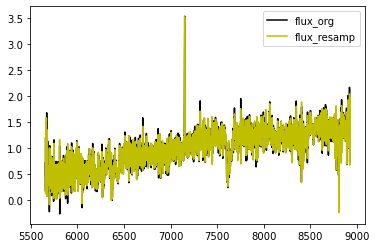

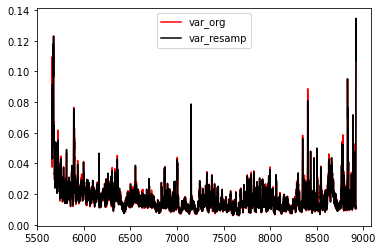

In [56]:
plt.plot(spec2['wav'][10:-5], spec2['flux'][10:-5], 'k', label='flux_org')
plt.plot(spec1['wav'][10:-5], spec2.rsflux[10:-5], 'y', label='flux_resamp')
plt.legend()
plt.figure()
plt.plot(spec2['wav'][10:-5], spec2['var'][10:-5], 'r', label='var_org')
#plt.plot(spec1['wav'], sp_2_rserr**2, 'b', label='var_resamp')
plt.plot(spec1['wav'][10:-5], varout2[10:-5], 'k', label='var_resamp')
plt.legend()

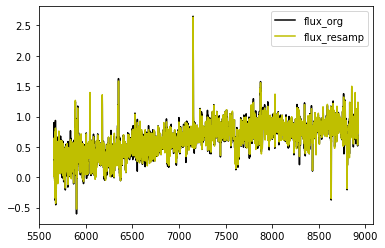

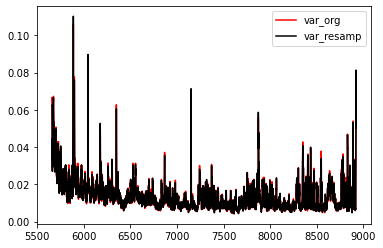

In [58]:
plt.plot(spec3['wav'][10:-5], spec3['flux'][10:-5], 'k', label='flux_org')
plt.plot(spec1['wav'][10:-5], spec3.rsflux[10:-5], 'y', label='flux_resamp')
plt.legend()
plt.figure()
plt.plot(spec3['wav'][10:-5], spec3['var'][10:-5], 'r', label='var_org')
#plt.plot(spec1['wav'], sp_2_rserr**2, 'b', label='var_resamp')
plt.plot(spec1['wav'][10:-5], varout3[10:-5], 'k', label='var_resamp')
plt.legend()

In [59]:
spec2_resamp = spec1d.Spec1d(wav=spec2.rswav, flux=spec2.rsflux, var=varout2)
spec3_resamp = spec1d.Spec1d(wav=spec3.rswav, flux=spec3.rsflux, var=varout3)

 Spectrum Start:  5649.56
 Spectrum End:     8925.56
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80

 Spectrum Start:  5649.56
 Spectrum End:     8925.56
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80



In [60]:
coadded_spec = spec1.__add__(spec2_resamp)

 Spectrum Start:  5649.56
 Spectrum End:     8925.56
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80



In [61]:
coadded_spec = coadded_spec.__add__(spec3_resamp)

 Spectrum Start:  5649.56
 Spectrum End:     8925.56
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80



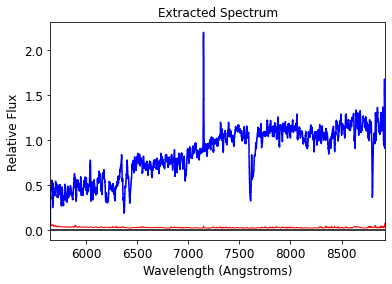

In [62]:
# final coadded 1d spectrum
coadded_spec.smooth(7)

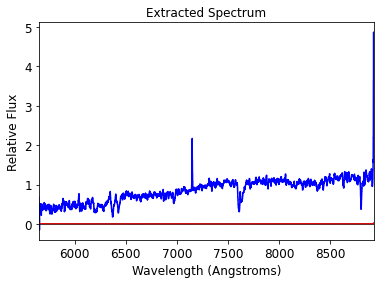

In [25]:
# final coadded 1d spectrum
coadded_spec.smooth(7)

In [63]:
coadded_spec.save('B0631_LRIS_spectra/spec1d_B0631_lris_coadd1d_deflector_Jan2022', outformat='fits')

Saved spectrum to file B0631_LRIS_spectra/spec1d_B0631_lris_coadd1d_deflector_Jan2022 in format fits


In [64]:
sp = spec1d.Spec1d('B0631_LRIS_spectra/spec1d_B0631_lris_coadd1d_deflector.fits', informat='fits', 
                   trimsec=[12, -5])
sp1 = spec1d.Spec1d('B0631_LRIS_spectra/spec1d_B0631_lris_coadd1d_deflector_Jan2022', informat='fits', 
                   trimsec=[12, -5])


Reading spectrum from B0631_LRIS_spectra/spec1d_B0631_lris_coadd1d_deflector.fits
Expected file format: fits
 Spectrum Start:  5659.15
 Spectrum End:     8921.56
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80


Reading spectrum from B0631_LRIS_spectra/spec1d_B0631_lris_coadd1d_deflector_Jan2022
Expected file format: fits
 Spectrum Start:  5659.15
 Spectrum End:     8921.56
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80



<IPython.core.display.Javascript object>


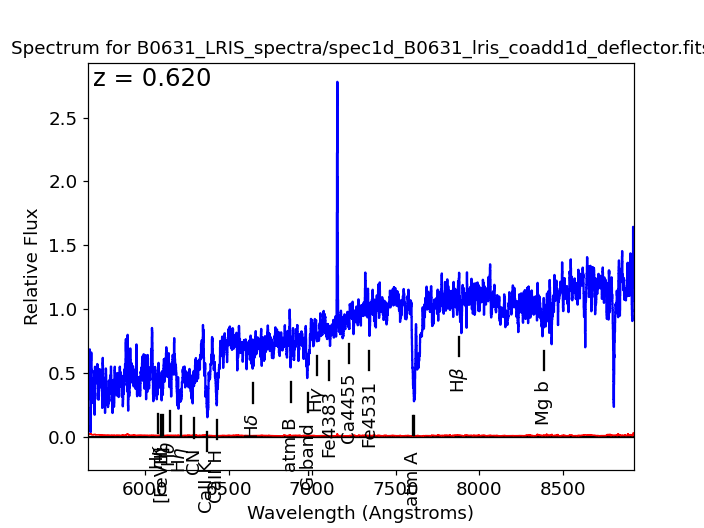


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-kappa       3750.00       6075.00
[Fe VII]      3761.40       6093.47
H-iota        3770.00       6107.40
H-theta       3797.00       6151.14
H-eta         3835.00       6212.70
CN bandhd     3883.00       6290.46
CaII K        3933.67       6372.55
CaII H        3968.47       6428.92
H-delta       4101.00       6643.62
G-band        4305.00       6974.10
H-gamma       4340.00       7030.80
Fe4383        4383.00       7100.46
Ca4455        4455.00       7217.10
Fe4531        4531.00       7340.22
H-beta        4861.00       7874.82
Mg I (b)      5176.00       8385.12



In [65]:
%matplotlib notebook
sp.smooth(3)
sp.mark_lines('abs', z=0.620, usesmooth=True)

<IPython.core.display.Javascript object>


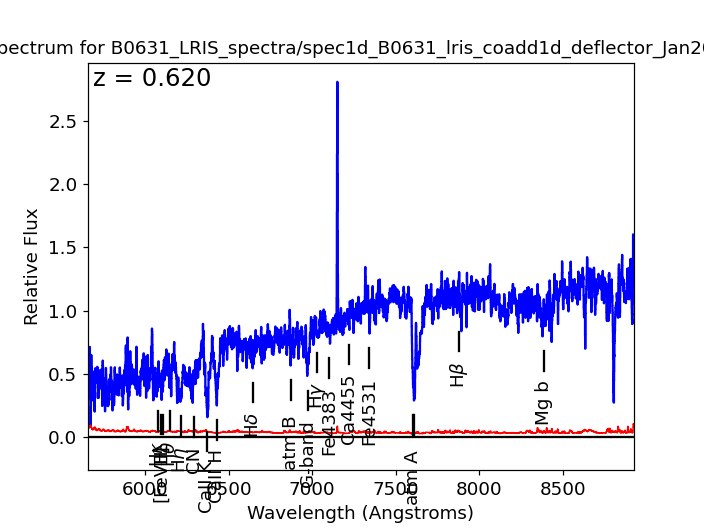


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-kappa       3750.00       6075.00
[Fe VII]      3761.40       6093.47
H-iota        3770.00       6107.40
H-theta       3797.00       6151.14
H-eta         3835.00       6212.70
CN bandhd     3883.00       6290.46
CaII K        3933.67       6372.55
CaII H        3968.47       6428.92
H-delta       4101.00       6643.62
G-band        4305.00       6974.10
H-gamma       4340.00       7030.80
Fe4383        4383.00       7100.46
Ca4455        4455.00       7217.10
Fe4531        4531.00       7340.22
H-beta        4861.00       7874.82
Mg I (b)      5176.00       8385.12



In [66]:
sp1.smooth(3)
sp1.mark_lines('abs', z=0.620, usesmooth=True)